In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', 100)
df = pd.read_csv('train.csv')
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [2]:
df['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

In [3]:
df.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [4]:
df.drop(['AnimalID', 'OutcomeSubtype'], axis=1, inplace=True)
df.dropna(inplace=True, subset=['AgeuponOutcome'])
df['SexuponOutcome'].fillna("Unknown", inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [5]:
df.isnull().any()

Name               True
DateTime          False
OutcomeType       False
AnimalType        False
SexuponOutcome    False
AgeuponOutcome    False
Breed             False
Color             False
dtype: bool

In [6]:
df['has_no_name'] = df['Name'].isnull()
df['days_old'] = df['AgeuponOutcome'].apply(lambda x: int(x.split()[0]) * (365 if x.split()[1] in "years" else 30.5 if x.split()[1] in "months" else 7 if x.split()[1] in "weeks" else 1))
df['weekday_name'] = df['DateTime'].apply(lambda x: x.weekday_name)
df['month'] = df['DateTime'].apply(lambda x: x.month)
df['gender'] = df['SexuponOutcome'].apply(lambda x: x if  x == "Unknown" else x.split()[1])
df['neutered_status'] = df['SexuponOutcome'].apply(lambda x: x if x == "Unknown" else "Neutered" if x.split()[0] == "Spayed" else x.split()[0])
df['time_of_day'] = df['DateTime'].apply(lambda x: int(24 if x.hour == 0 else x.hour) + int(x.minute)/60)




In [7]:
breed_list = ['mix', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'collie', 'corgi', 'dalmatian', 'daschund', 'hound', 'pit bull', 'poodle', 'retriever', 'rottweiler', 'shephard', 'spaniel', 'terrier']
for i in range(len(breed_list)):
    df[breed_list[i]] = df['Breed'].apply(lambda x: breed_list[i] in x.lower())

In [8]:
colors = np.sort(df.Color.apply(lambda x: x.lower().split('/')[0].split()[0]).unique())
for i in range(len(colors)):
    df[colors[i]] = df['Color'].apply(lambda x: colors[i] in x.lower())

In [9]:
df.drop(['Name', 'DateTime', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'], axis=1, inplace=True)
df.head()

,OutcomeType,AnimalType,has_no_name,days_old,weekday_name,month,gender,neutered_status,time_of_day,mix,beagle,boxer,bulldog,chihuahua,collie,corgi,dalmatian,daschund,hound,pit bull,poodle,retriever,rottweiler,shephard,spaniel,terrier,agouti,apricot,black,blue,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,orange,pink,red,ruddy,sable,seal,silver,tan,torbie,tortie,tricolor,white,yellow
0,Return_to_owner,Dog,False,365.0,Wednesday,2,Male,Neutered,18.366667,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,Euthanasia,Cat,False,365.0,Sunday,10,Female,Neutered,12.733333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Adoption,Dog,False,730.0,Saturday,1,Male,Neutered,12.466667,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,Transfer,Cat,True,21.0,Friday,7,Male,Intact,19.150000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Transfer,Dog,True,730.0,Friday,11,Male,Neutered,12.866667,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [10]:
df = pd.concat([df, pd.get_dummies(df['AnimalType']), pd.get_dummies(df['weekday_name']), pd.get_dummies(df['month'], prefix='month'), pd.get_dummies(df['gender'], prefix='gender'), pd.get_dummies(df['neutered_status'], prefix='neutered_status')], axis=1)


In [11]:
df.drop(['AnimalType', 'weekday_name', 'month', 'gender', 'neutered_status'], axis=1, inplace=True)
df.head()

,OutcomeType,has_no_name,days_old,time_of_day,mix,beagle,boxer,bulldog,chihuahua,collie,corgi,dalmatian,daschund,hound,pit bull,poodle,retriever,rottweiler,shephard,spaniel,terrier,agouti,apricot,black,blue,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,orange,pink,red,ruddy,sable,seal,silver,tan,torbie,tortie,tricolor,white,yellow,Cat,Dog,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,gender_Female,gender_Male,gender_Unknown,neutered_status_Intact,neutered_status_Neutered,neutered_status_Unknown
0,Return_to_owner,False,365.0,18.366667,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,Euthanasia,False,365.0,12.733333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,Adoption,False,730.0,12.466667,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Transfer,True,21.0,19.150000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,Transfer,True,730.0,12.866667,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


Classification Report:
                 precision    recall  f1-score   support

       Adoption       0.69      0.79      0.74      3218
           Died       0.21      0.09      0.13        54
     Euthanasia       0.53      0.23      0.32       463
Return_to_owner       0.49      0.54      0.51      1460
       Transfer       0.76      0.67      0.72      2819

    avg / total       0.67      0.67      0.66      8014



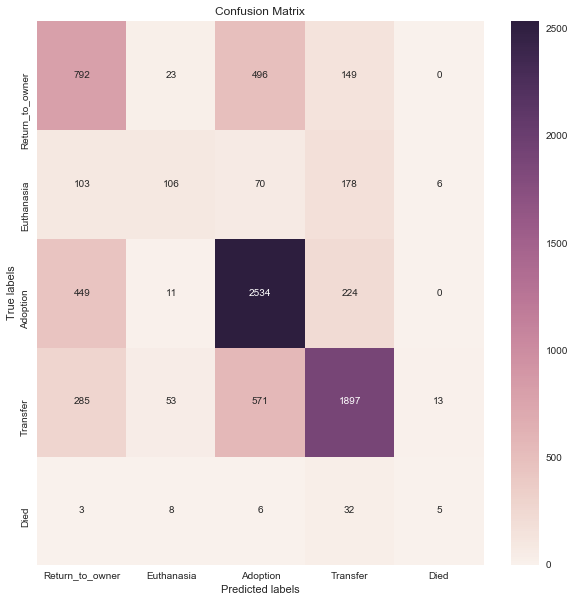

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

X = df.iloc[:,1:]
y = df['OutcomeType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'])

plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'])
ax.yaxis.set_ticklabels(['Died', 'Transfer', 'Adoption', 'Euthanasia', 'Return_to_owner'])

print ("Classification Report:")
print(classification_report(y_test, y_pred))